<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_5_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PhD Publications Dataset Clustering Analysis

This notebook contains a clustering analysis of the PhD Publications dataset, exploring multiple clustering algorithms and visualization techniques.

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Step 1: Data Loading and Preprocessing

In [3]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)
# Select numeric columns for clustering
numeric_data = data[['articles', 'kids', 'prestige', 'mentor']]
numeric_data.head()


,articles,kids,prestige,mentor
0,0,0,2.52,7
1,0,0,2.05,6
2,0,0,3.75,6
3,0,1,1.18,3
4,0,0,3.75,26


## Step 2: Data Scaling

In [4]:

# Scaling features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


## Step 3: K-Means Clustering

In [5]:

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate cluster means
cluster_means = data.groupby('Cluster')[['articles', 'kids', 'prestige', 'mentor']].mean()
cluster_means


,articles,kids,prestige,mentor
Cluster,,,,
0,1.166038,1.475472,2.932585,6.347170
1,3.642157,0.303922,3.862451,19.754902
2,1.114350,0.000000,2.857108,5.179372


## Step 4: Cluster Visualization

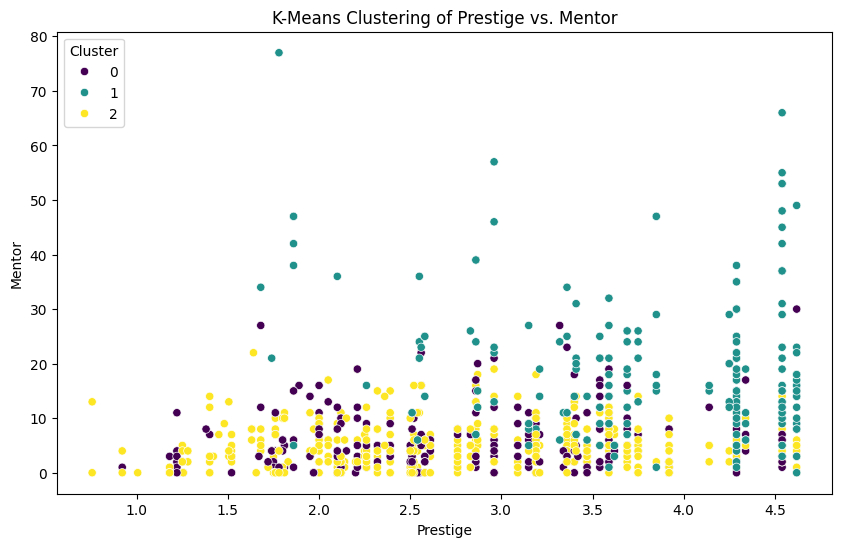

In [6]:

# Visualize clusters for two features (e.g., prestige vs. mentor)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering of Prestige vs. Mentor")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()


## Step 5: Cluster Mean Heatmap

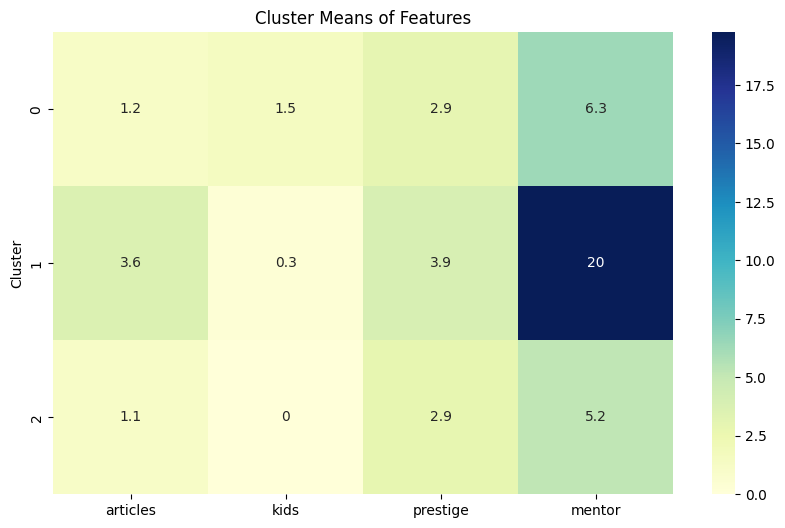

In [7]:

# Heatmap of cluster means
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Means of Features")
plt.show()


## Step 6: Spectral Clustering

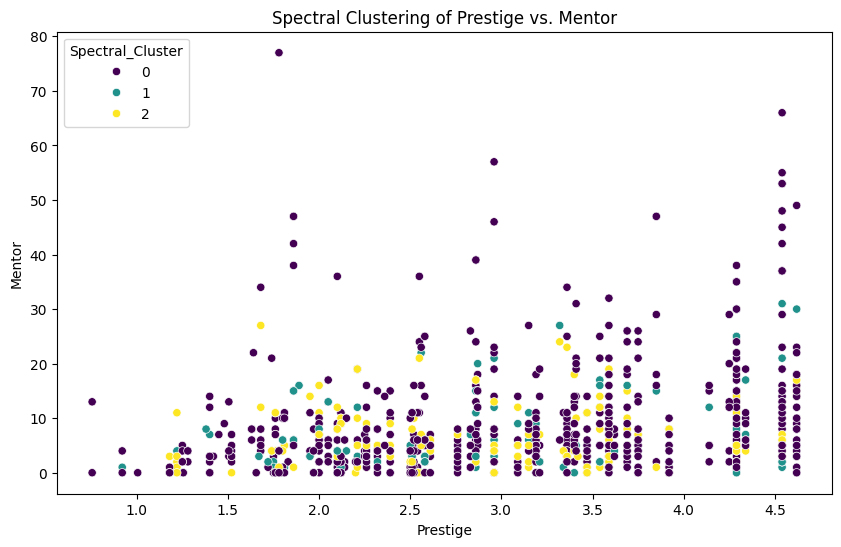

In [8]:

from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

# Visualize Spectral Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='Spectral_Cluster', palette='viridis')
plt.title("Spectral Clustering of Prestige vs. Mentor")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()


## Step 7: Minimum Spanning Tree (MST) Clustering

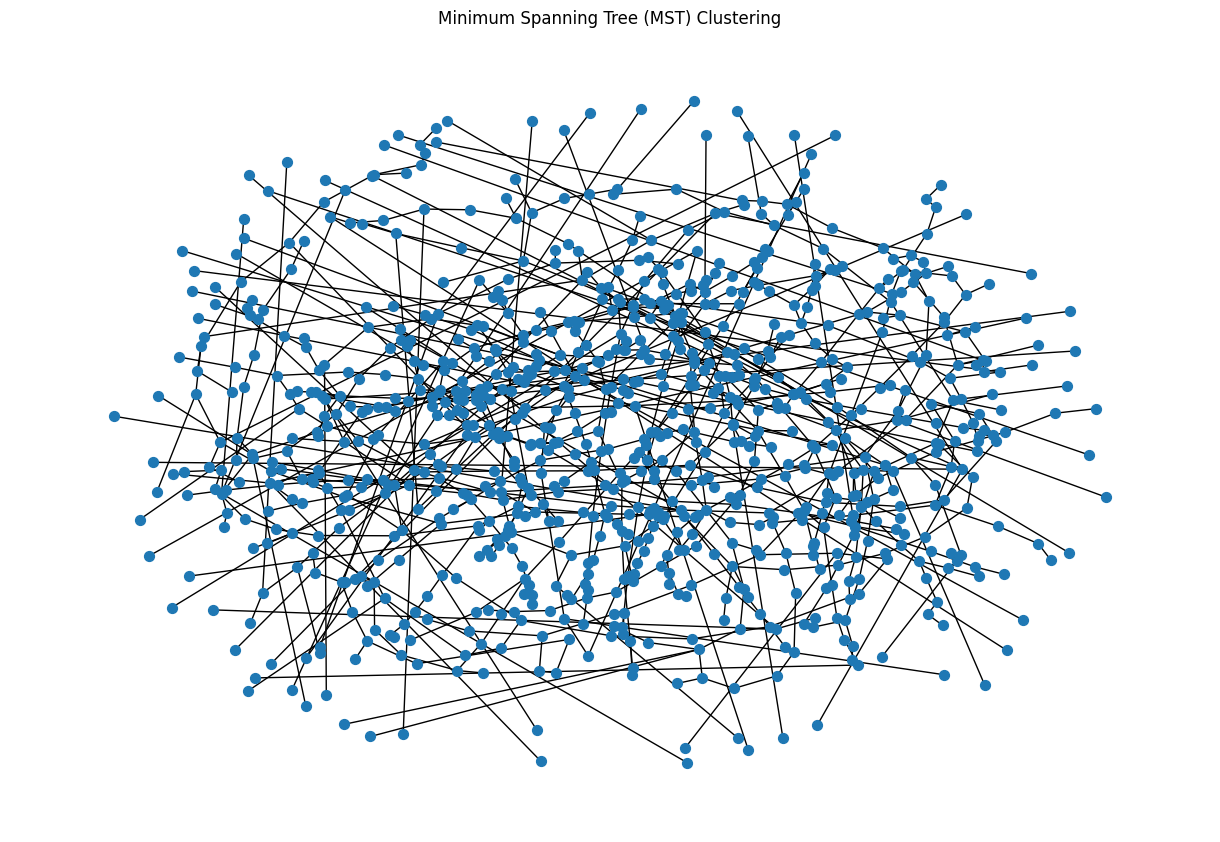

In [9]:

import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances

# Calculate pairwise distances
distances = euclidean_distances(scaled_data)

# Create MST graph
G = nx.Graph()
for i in range(len(distances)):
    for j in range(i + 1, len(distances)):
        G.add_edge(i, j, weight=distances[i][j])

# Compute MST
mst = nx.minimum_spanning_tree(G)

# Visualize MST
plt.figure(figsize=(12, 8))
nx.draw(mst, with_labels=False, node_size=50, font_size=12)
plt.title("Minimum Spanning Tree (MST) Clustering")
plt.show()


## Step 8: Expectation-Maximization (Gaussian Mixture Model) Clustering

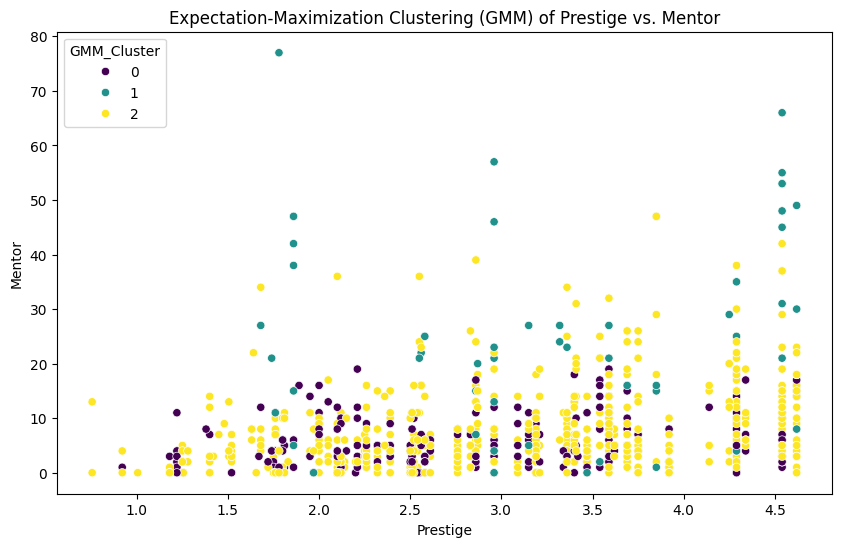

In [10]:

from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# Visualize GMM Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='GMM_Cluster', palette='viridis')
plt.title("Expectation-Maximization Clustering (GMM) of Prestige vs. Mentor")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()


## Step 9: Hierarchical Agglomerative Clustering

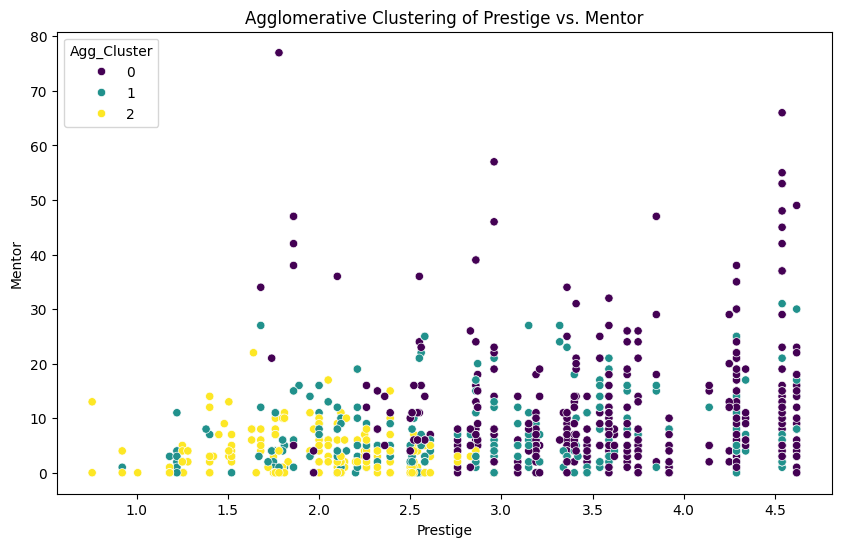

In [11]:

from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['Agg_Cluster'] = agg_clustering.fit_predict(scaled_data)

# Visualize Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='Agg_Cluster', palette='viridis')
plt.title("Agglomerative Clustering of Prestige vs. Mentor")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()


## Step 10: Outlier Detection using K-Means

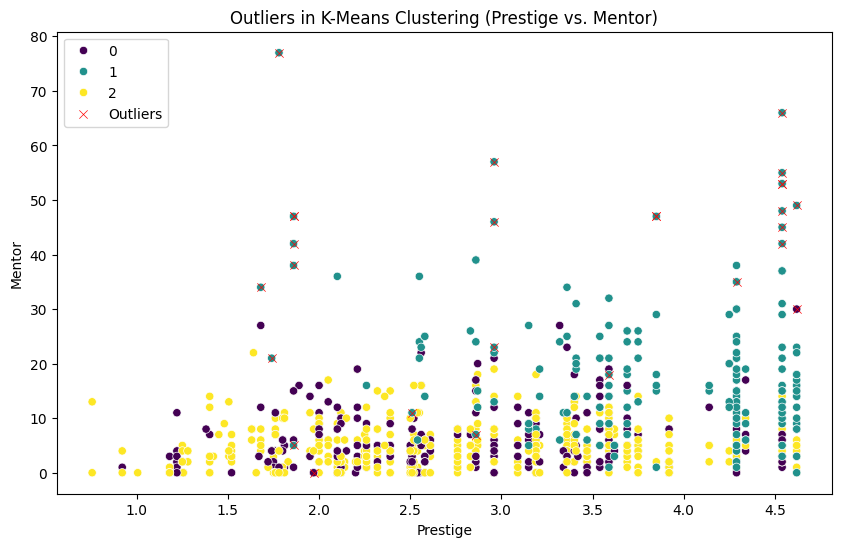

In [13]:
# Outlier detection based on distance from cluster centroid
distances_to_centroid = kmeans.transform(scaled_data).min(axis=1)
outlier_threshold = distances_to_centroid.mean() + 2 * distances_to_centroid.std()
outliers = data[distances_to_centroid > outlier_threshold]

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='Cluster', palette='viridis')
sns.scatterplot(data=outliers, x='prestige', y='mentor', color='red', marker='x', label='Outliers')
plt.title("Outliers in K-Means Clustering (Prestige vs. Mentor)")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.legend()
plt.show()
